In [1]:
import pandas as pd
df = pd.read_csv('csv/covid19.csv')
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


In [2]:
#elimino le colonne che al momento non ci interessano
df.drop(['stato', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 
            'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi',
            'nuovi_positivi', 'dimessi_guariti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
            'totale_casi', 'note', 'tamponi', 'casi_testati'], axis=1, inplace=True)
df.head()

,data,deceduti
0,2020-02-24T18:00:00,7
1,2020-02-25T18:00:00,10
2,2020-02-26T18:00:00,12
3,2020-02-27T18:00:00,17
4,2020-02-28T18:00:00,21


In [3]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
# elimino l'orario dal campo data
df['data'] = df['data'].dt.strftime('%Y-%m-%d')
df['deceduti'] = pd.to_numeric(df['deceduti'])
df.head()

,data,deceduti
0,2020-02-24,7
1,2020-02-25,10
2,2020-02-26,12
3,2020-02-27,17
4,2020-02-28,21


In [4]:
#prendo i valori fino al 30 giugno in quanto la ts dei decessi totali termina il 30 giugno
df = df[df['data'] < '2020-07-01']
df.head()

,data,deceduti
0,2020-02-24,7
1,2020-02-25,10
2,2020-02-26,12
3,2020-02-27,17
4,2020-02-28,21


In [5]:
df=df.set_index('data')
df.head()

,deceduti
data,
2020-02-24,7
2020-02-25,10
2020-02-26,12
2020-02-27,17
2020-02-28,21


In [6]:
#dato che il numero di decessi è riportato per incremento effettuo l'operazione di differenza per trovare il numero effettivo
import numpy as np

df_diff = df.diff()
df_diff.head()

,deceduti
data,
2020-02-24,NaN
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [7]:
#aggiungo manualmente il primo valore della serie che dopo l'operazione di differenza risulta essere 'NaN'
df_diff.fillna(7, inplace=True)
df_diff.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [8]:
ts = df_diff.deceduti
ts

data
2020-02-24     7.0
2020-02-25     3.0
2020-02-26     2.0
2020-02-27     5.0
2020-02-28     4.0
              ... 
2020-06-26    30.0
2020-06-27     8.0
2020-06-28    22.0
2020-06-29     6.0
2020-06-30    23.0
Name: deceduti, Length: 128, dtype: float64

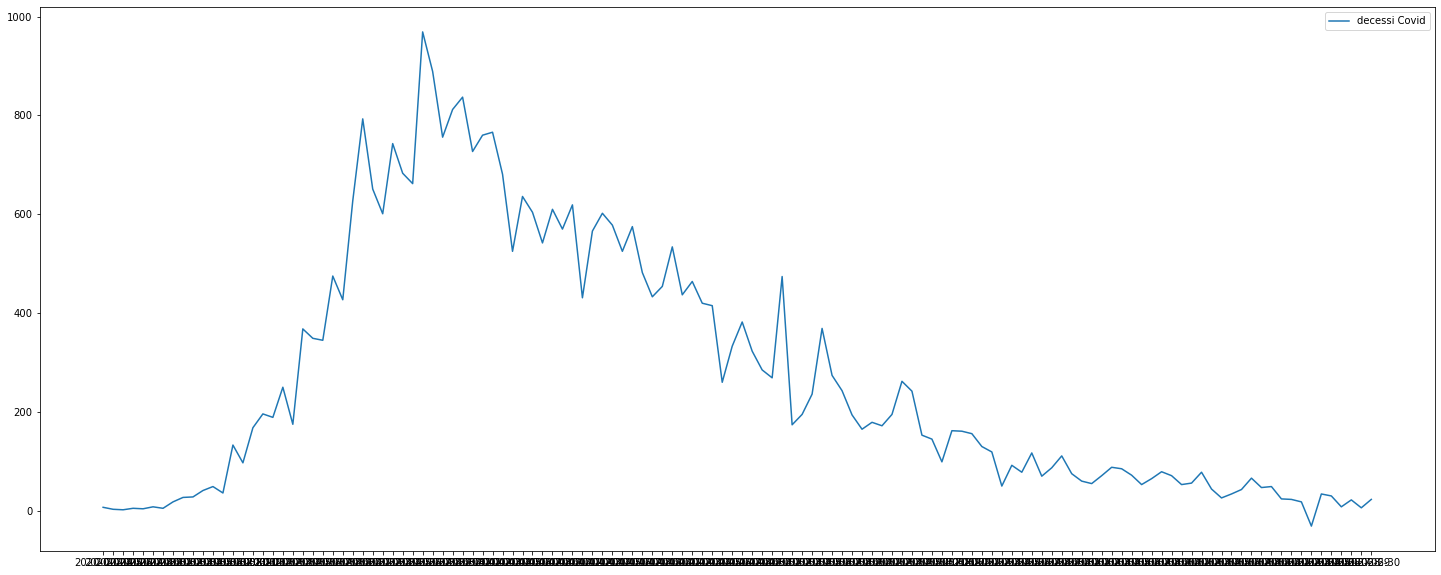

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(ts, label='decessi Covid')

plt.legend()
plt.show()

In [10]:
df_diff.to_csv('csv/decessi_covid19_30giugno.csv')